In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
maze = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 2],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 0, 0],
])

In [3]:
# Maze shape
rows, cols = maze.shape

# Define possible actions (Up, Down, Left, Right)
actions = ['up', 'down', 'left', 'right']

In [4]:
# ---- Step 3: Define Parameters ----
alpha = 0.7     # Learning rate
gamma = 0.9     # Discount factor
epsilon = 0.1   # Exploration rate
episodes = 500  # Number of training episodes
max_steps = 100 # Max steps per episode

In [5]:
# Initialize Q-table (rows x cols x actions)
Q = np.zeros((rows, cols, len(actions)))

In [6]:
Q

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [7]:
# ---- Helper Function: Get Next State and Reward ----
def get_next_state_reward(state, action):
    i, j = state
    if action == 'up':
        i = max(i - 1, 0)
    elif action == 'down':
        i = min(i + 1, rows - 1)
    elif action == 'left':
        j = max(j - 1, 0)
    elif action == 'right':
        j = min(j + 1, cols - 1)

    # If it's a wall, no movement
    if maze[i, j] == 1:
        return state, -5  # penalty for hitting a wall
    elif maze[i, j] == 2:
        return (i, j), 10  # reward for reaching goal
    else:
        return (i, j), -1  # small penalty for each move


In [8]:
random.uniform(0, 1)

0.9858744327387615

In [9]:
# ---- Step 4: Train the Agent ----
rewards_per_episode = []

for episode in range(episodes):
    state = (0, 0)  # start at top-left corner
    total_reward = 0

    for step in range(max_steps):
        # Choose action (ε-greedy policy)
        if random.uniform(0, 1) < epsilon:
            action_index = random.choice(range(len(actions)))
        else:
            action_index = np.argmax(Q[state[0], state[1]])

        action = actions[action_index]
        next_state, reward = get_next_state_reward(state, action)

        # Update Q-value using Q-learning formula
        best_next_action = np.max(Q[next_state[0], next_state[1]])
        Q[state[0], state[1], action_index] += alpha * (
            reward + gamma * best_next_action - Q[state[0], state[1], action_index]
        )

        state = next_state
        total_reward += reward

        # Stop if goal is reached
        if maze[state] == 2:
            break

    rewards_per_episode.append(total_reward)

In [10]:
# ---- Step 5: Results ----
print("\nTraining Completed!")
print("Q-Table Learned (Partial View):")
print(np.round(Q, 2))


Training Completed!
Q-Table Learned (Partial View):
[[[ -3.37 -10.    -3.37   1.81]
  [  1.81  -2.19  -2.19   3.12]
  [  3.12   4.58   1.81   4.58]
  [  4.58   6.2    3.12   6.2 ]
  [ -1.35   8.     2.86  -1.35]]

 [[-14.   -14.   -10.   -14.  ]
  [  0.     0.     0.     0.  ]
  [  2.72   0.21  -0.64   6.2 ]
  [  4.58   2.2    4.58   8.  ]
  [  6.2   10.     6.2    8.  ]]

 [[  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]]

 [[  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]]

 [[  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]
  [  0.     0.     0.     0.  ]]]


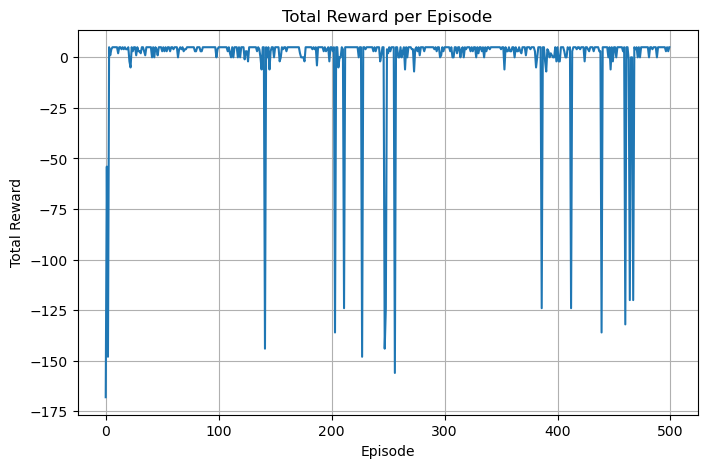

In [11]:
# ---- Step 6: Plot Learning Progress ----
plt.figure(figsize=(8,5))
plt.plot(rewards_per_episode)
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

In [12]:
# ---- Step 7: Test the Agent ----
state = (0, 0)
path = [state]

for _ in range(50):
    action_index = np.argmax(Q[state[0], state[1]])
    action = actions[action_index]
    next_state, reward = get_next_state_reward(state, action)
    path.append(next_state)
    state = next_state
    if maze[state] == 2:
        print("\nGoal reached!")
        break

print("\nOptimal Path Learned by Agent:")
print(path)


Goal reached!

Optimal Path Learned by Agent:
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4)]


In [46]:
# ---- Step 8: Visualize Path on Maze ----
maze_display = maze.copy()
for step in path:
    if maze_display[step] == 0:
        maze_display[step] = 3  # mark visited path

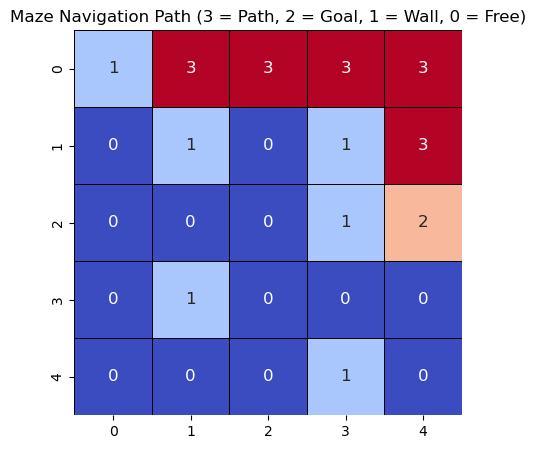

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(maze_display, cmap="coolwarm", cbar=False, linewidths=0.5,
            linecolor='black', annot=True, fmt=".0f",
            annot_kws={'size': 12})
plt.title("Maze Navigation Path (3 = Path, 2 = Goal, 1 = Wall, 0 = Free)")
plt.show()